In [1]:
from pandas import read_excel
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = "Sample_T1_data.xlsx"
sheet = 'Sheet1'
df = read_excel(file, sheet_name = sheet)
df = df.set_index(df.columns[0])
robots = df["robot"].unique()
plates = df["plate"].unique()
stacker_position = df["stacker_position"].unique()

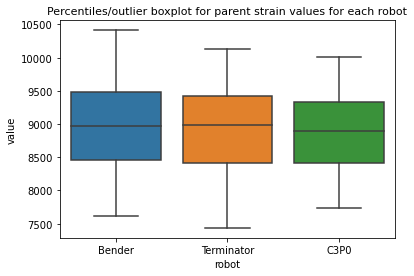

<Figure size 432x288 with 0 Axes>

In [3]:
#robots box plot
parent_strains = df.loc[df["well_type"] == "Parent Strain"]
sns.boxplot(data=parent_strains, x="robot", y="value")
plt.title('Percentiles/outlier boxplot for parent strain values for each robot', fontsize=11)
plt.show()
plt.clf()

In [4]:
parent_strains_plate = parent_strains.groupby(by=["plate", "robot"])["value"].mean()
parent_strains_stacker = parent_strains.groupby(by=["robot", "stacker_position"])["value"].mean()

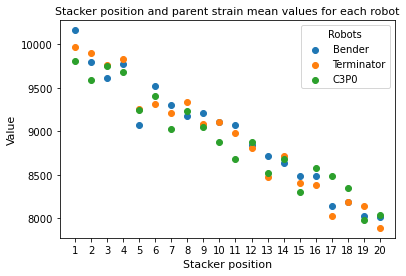

In [5]:
#the stacker positions vs parent strain mean values
for robot in robots:
    plt.scatter(stacker_position, parent_strains_stacker[robot], label=robot)
plt.xticks(stacker_position)
plt.legend(title='Robots')
plt.ylabel('Value', fontsize=11)
plt.xlabel('Stacker position', fontsize=11)
plt.title('Stacker position and parent strain mean values for each robot', fontsize=11)
plt.show()

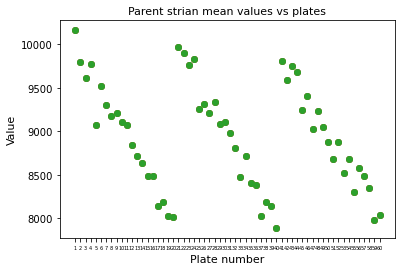

In [19]:
#the values vs plates
for robot in robots:
    plt.scatter(plates, parent_strains_plate.values, label=robot)
plt.xticks(plates, fontsize=5)
plt.ylabel('Value', fontsize=11)
plt.xlabel('Plate number', fontsize=11)
plt.title('Parent strian mean values vs plates', fontsize=11)
plt.show()

In [6]:
def remove_outliers(df):
    percentiles = df["value"].quantile([.25, .75])
    Q1 = percentiles[0.25]
    Q3 = percentiles[0.75]
    IQR = Q3 - Q1
    Lower_limit = Q1 - 1.5 * IQR
    Upper_limit = Q3 + 1.5 * IQR
    temp_df = df.loc[((df["value"] > Lower_limit) & (df["value"] < Upper_limit))]
    return temp_df

In [7]:
def function(x, a, b):
 	return a * x + b

In [8]:
# curve fit and pick the strains 
from scipy.optimize import curve_fit
import pandas as pd
standard_well_strains = df.loc[df["well_type"] == "Standard Well"]
best_fit_lines = []
lists_of_candidates = []
for robot in robots:
    popt, pcov = curve_fit(function, stacker_position, parent_strains_stacker[robot])
    param_1, param_0 = popt
    best_fit_lines.append(popt)
    predicted_values = function(stacker_position, param_1, param_0)
    temp_df = standard_well_strains.loc[standard_well_strains["robot"] == robot]
    candidates = []
    values = []
    for i in temp_df.index:
        if temp_df.loc[i]["value"] > predicted_values[int(temp_df.loc[i]["stacker_position"] - 1)]:
            candidates.append(temp_df.loc[i]["strain"])
            values.append(temp_df.loc[i]["value"] - predicted_values[int(temp_df.loc[i]["stacker_position"] - 1)])
    # lists_of_candidates.append(pd.DataFrame({robot + "_candidates": candidates, robot + "_candidates_dif_val": values}))
    lists_of_candidates.append(pd.DataFrame({"candidates": candidates, "candidates_dif_val": values}))

In [9]:
sorted_candidates = pd.concat(lists_of_candidates, \
                              axis = 0).sort_values(by=["candidates_dif_val"], ascending=False)

sorted_candidates[:20]

,candidates,candidates_dif_val
798,X3340,1601.119292
115,X2036,1554.770847
425,X4173,1545.609832
143,X2106,1528.611607
114,X2035,1498.356682
930,X5052,1443.809016
372,X4085,1391.661364
617,X3029,1317.401046
52,X1899,1303.665371
405,X894,1289.513990


In [10]:
sorted_candidates[:60]

,candidates,candidates_dif_val
798,X3340,1601.119292
115,X2036,1554.770847
425,X4173,1545.609832
143,X2106,1528.611607
114,X2035,1498.356682
930,X5052,1443.809016
372,X4085,1391.661364
617,X3029,1317.401046
52,X1899,1303.665371
405,X894,1289.513990


In [11]:
sorted_candidates[:120]

,candidates,candidates_dif_val
798,X3340,1601.119292
115,X2036,1554.770847
425,X4173,1545.609832
143,X2106,1528.611607
114,X2035,1498.356682
...,...,...
478,X2769,641.387084
730,X3224,639.972679
475,X2766,639.603490
738,X3250,639.540634
